In [1]:
!pip install diffusers transformers accelerate gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 102.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 62.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

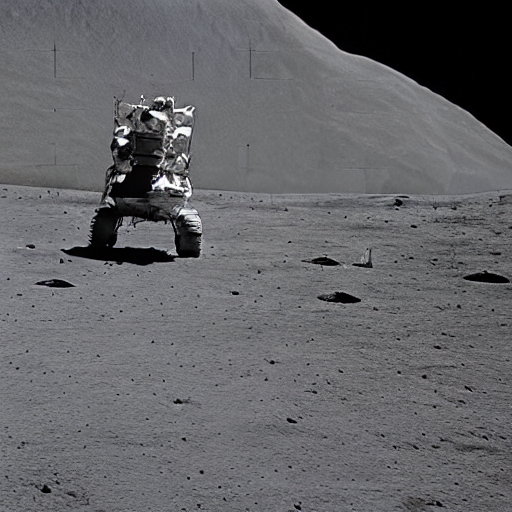

In [8]:
from diffusers import StableDiffusionPipeline
import torch
import gradio as gr
from PIL import Image

# Load the Stable Diffusion model
# Use torch_dtype=torch.float16 for efficiency on GPU
# Check if CUDA is available, otherwise use CPU
device = "cuda" if torch.cuda.is_available() else "cpu"
pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16 if device == "cuda" else torch.float32)
pipe = pipe.to(device)

# Define the image generation function
def generate_sd_image(prompt, num_inference_steps=50, guidance_scale=7.5):
    """
    Generates an image using the Stable Diffusion pipeline.

    Args:
        prompt (str): The text prompt for image generation.
        num_inference_steps (int): The number of inference steps.
        guidance_scale (float): The guidance scale.

    Returns:
        PIL.Image.Image: The generated image.
    """
    with torch.no_grad():
        image = pipe(prompt, num_inference_steps=num_inference_steps, guidance_scale=guidance_scale).images[0]
    return image

# Example usage (you can modify or remove this part)
prompt = "a photo of an astronaut riding a horse on the moon"
generated_image = generate_sd_image(prompt)
display(generated_image)

# You can also create a Gradio interface (optional)
def create_gradio_interface():
    iface = gr.Interface(
        fn=generate_sd_image,
        inputs=[
            gr.Textbox(label="Prompt"),
            gr.Slider(minimum=1, maximum=100, value=50, step=1, label="Inference Steps"),
            gr.Slider(minimum=0, maximum=20, value=7.5, step=0.1, label="Guidance Scale")
        ],
        outputs="image",
        title="Stable Diffusion Image Generator"
    )
    iface.launch(share=True)

# Uncomment the line below to launch the Gradio interface
# create_gradio_interface()